In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [3]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\PCA\wine.csv")

In [4]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 14)

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
null_counts = data.isnull().sum()
print(null_counts)

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


The dataset has no missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**Verifying Unique Values**

In [9]:
data.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [10]:
#Type
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

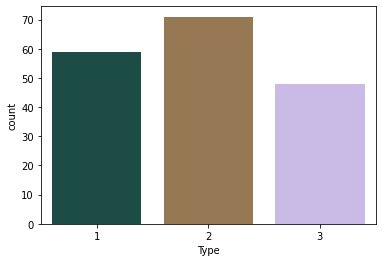

In [11]:
sns.countplot(x="Type", data= data, palette = 'cubehelix')

As we could see from the graph there are more number of observations for Type-2 wine in the data

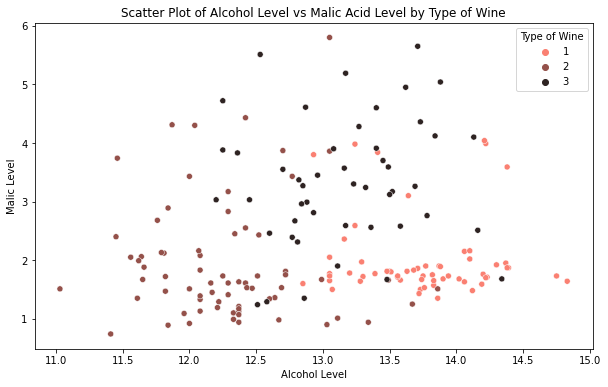

In [12]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Alcohol', y='Malic', hue='Type', palette='dark:salmon_r',
               marker = 'o')

# Add labels and title
plt.xlabel('Alcohol Level')
plt.ylabel('Malic Level')
plt.title('Scatter Plot of Alcohol Level vs Malic Acid Level by Type of Wine')

# Show plot
plt.legend(title='Type of Wine')
plt.show()

From the above scatter plot we can see that:

1) **Type-1** wine has high level of alcohol whereas level of Malice acid is low.

2) For **Type-2** wine most of the observations have low level of Alcohol and Malice acid.

3) Whereas in case of **Type-3** wine most of the wines have high level of Malice acid present in it with average alcohol level.

In [13]:
cat_list=[]
num_list=[]


for i in data.columns:
    unique_values = len(data[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [14]:
print(cat_list)
print('\n',num_list)

['Type']

 ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


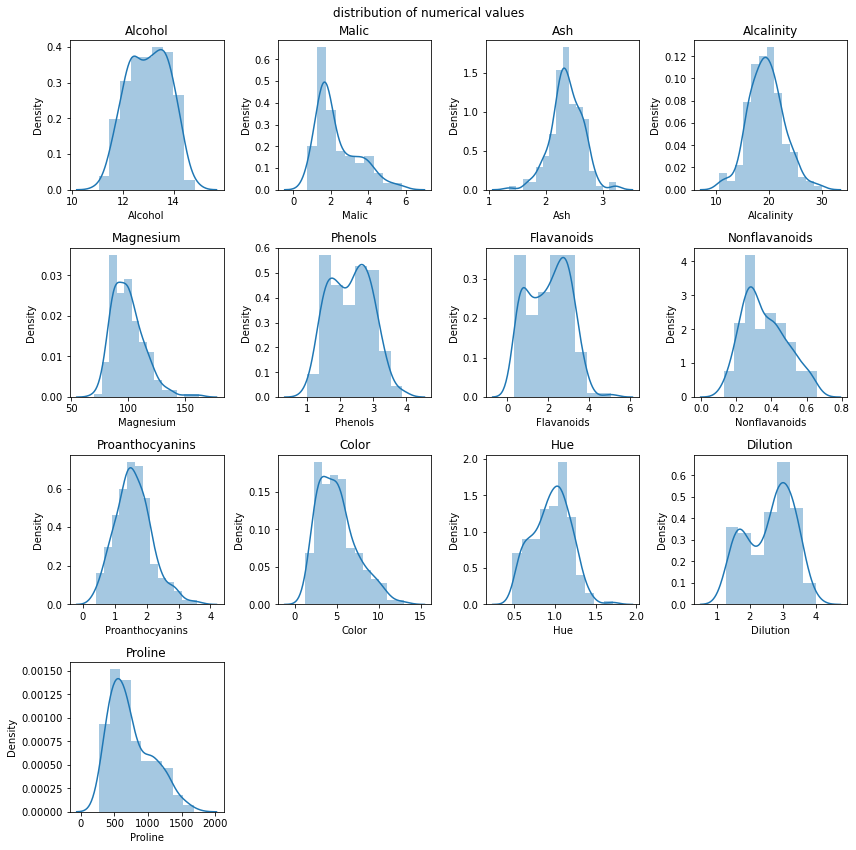

In [15]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in data.loc[:,num_list]:
    plt.subplot(4,4,k)
    sns.distplot(data[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

**Correlation Analysis**

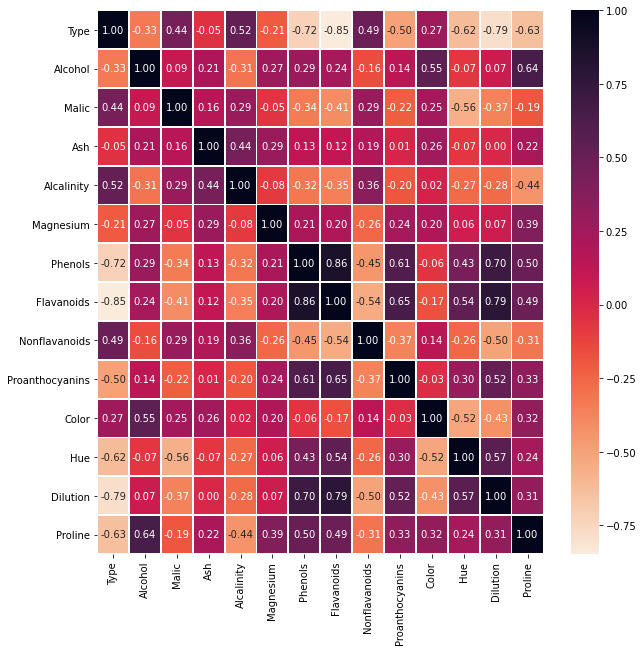

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="rocket_r")
plt.show()

A **positively high correlation** is present between the variables Phenol, FLavanoids and Dilution.

# PCA

In [17]:
# Converting the data into numpy array
wine = data.values

In [18]:
wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [19]:
# Normalizing the numerical data 
data_norm = scale(wine)

In [20]:
data_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
pca = PCA()
pca_values = pca.fit_transform(data_norm)
pca_values 

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [22]:
#loadings or weights
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [23]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [24]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

**SCREE PLOT**

In [25]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

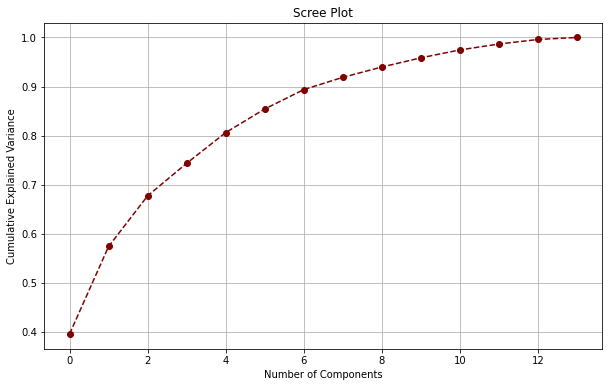

In [26]:
# Creating a scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='maroon')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Based on the scree plot, the 'elbow' is observed at the 5th principal component, suggesting that the first 5 components capture the most significant variance in the dataset.

In [27]:
# Printing explained variance ratio for each component
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")

Principal Component 1: 0.3954
Principal Component 2: 0.1784
Principal Component 3: 0.1033
Principal Component 4: 0.0663
Principal Component 5: 0.0627
Principal Component 6: 0.0481
Principal Component 7: 0.0396
Principal Component 8: 0.0250
Principal Component 9: 0.0210
Principal Component 10: 0.0187
Principal Component 11: 0.0161
Principal Component 12: 0.0121
Principal Component 13: 0.0093
Principal Component 14: 0.0041


Principal Component 1 (PC1) explains 39.54% of the total variance in the dataset.

Principal Component 2 (PC2) explains 17.84% of the total variance.

Principal Component 3 (PC3) explains 10.33% of the total variance.

And so on, each subsequent principal component explains a smaller proportion of the total variance.

The sum of all these explained variance ratios will equal 1

In [28]:
 pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

**PCA data:**

In [29]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), data[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


In [30]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

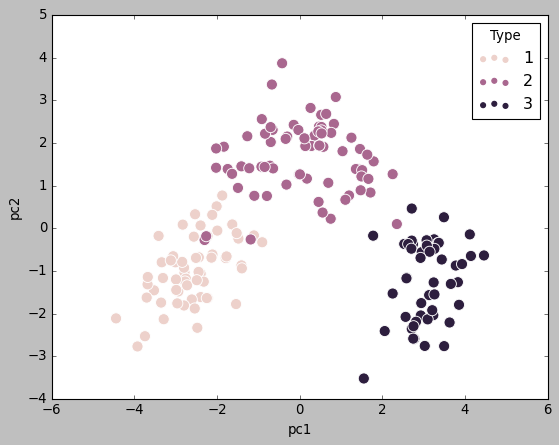

In [31]:
# Scatter plot for principal components 1 and 2:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

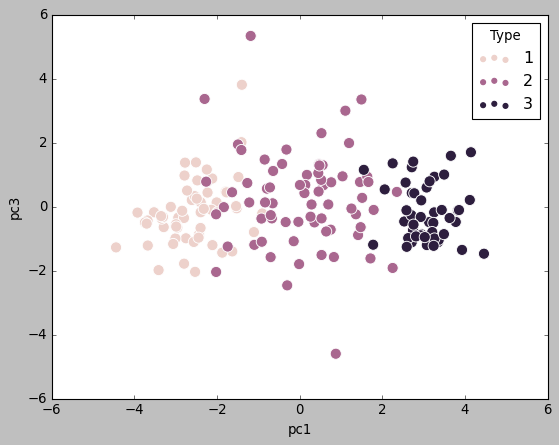

In [33]:
# Scatter plot for principal components 1 and 3:
sns.scatterplot(data=finalDf,x='pc1',y='pc3',hue='Type',s = 100)  

# KMeans Clustering:

In [34]:
from sklearn.cluster import KMeans

**KMEANS FOR NORMAL DATA:**

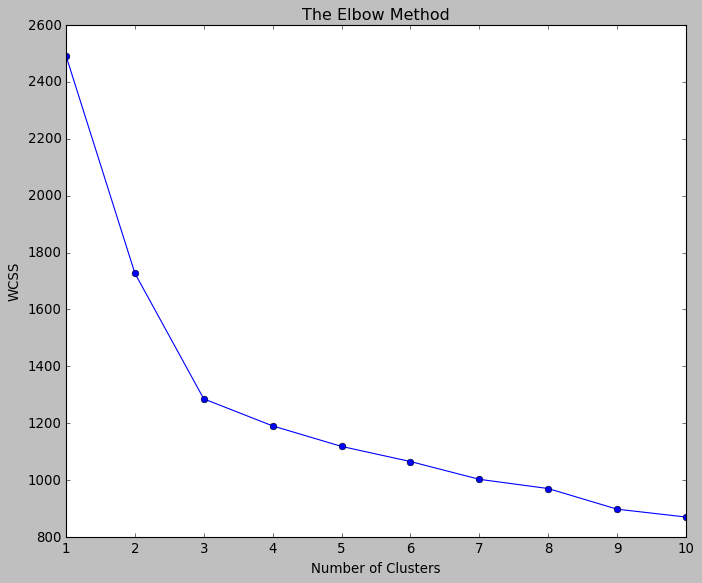

In [35]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

**The optimal cluster size is 4, as from the above elbow curve**

In [36]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data_norm)  

In [37]:
clf.cluster_centers_ 

array([[-1.27064281e-01, -7.68109962e-01,  1.23923910e-01,
         4.87926405e-01,  6.46530458e-01,  2.62487446e-01,
         7.21830558e-01,  6.72989351e-01, -3.66258974e-01,
         8.53442148e-01, -7.12222100e-01,  1.76154114e-01,
         6.03839935e-01, -5.03701751e-01],
       [ 7.99603601e-02, -8.89902046e-01, -5.59868243e-01,
        -7.73539204e-01,  2.92641875e-04, -5.72220211e-01,
        -3.88827189e-01, -2.12353580e-01,  1.64306444e-01,
        -3.00144346e-01, -9.00684897e-01,  5.65964682e-01,
         1.28198375e-01, -7.75376761e-01],
       [ 1.34745816e+00,  1.86543138e-01,  9.04971453e-01,
         2.49210264e-01,  5.83703484e-01, -5.06353947e-02,
        -9.88556997e-01, -1.23619475e+00,  7.16841717e-01,
        -7.49607560e-01,  9.88498285e-01, -1.19129878e+00,
        -1.30153966e+00, -3.80044610e-01],
       [-1.21394365e+00,  9.75769737e-01, -3.63784637e-01,
         2.45344690e-01, -8.14164939e-01,  4.35595246e-01,
         8.99019294e-01,  9.84620622e-01, -6.

In [38]:
clf.inertia_

1187.1638676379532

In [39]:
md=pd.Series(y_kmeans) 
data['cluster']=md
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


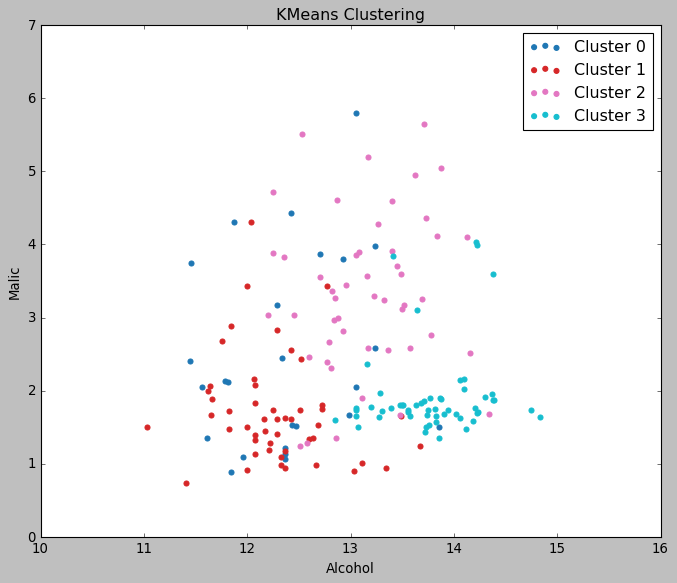

In [40]:
# Select the two features for the scatter plot
x_feature = 'Alcohol'
y_feature = 'Malic'

# Scatter plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(data['cluster'])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], 
                label=f'Cluster {cluster}', color=color)

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('KMeans Clustering')
plt.legend()
plt.show()

**KMEANS FOR PCA DATA:**

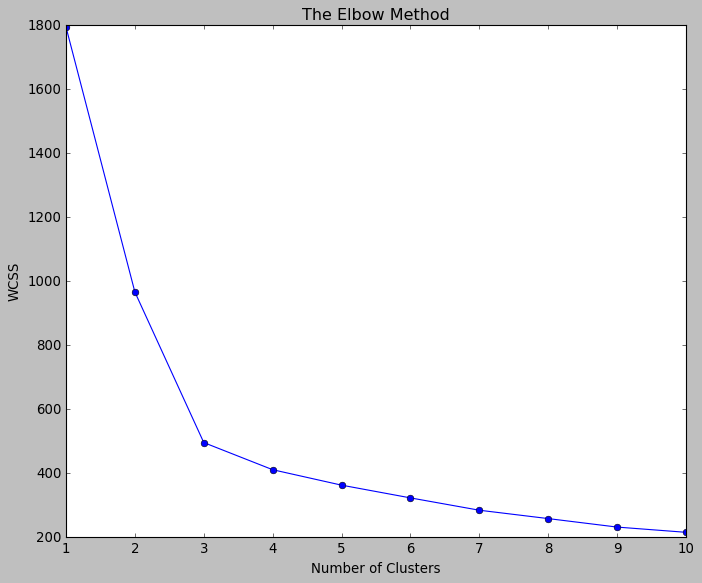

In [41]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf_pca = KMeans(n_clusters=i)
    clf_pca.fit(finalDf)
    WCSS.append(clf_pca.inertia_)
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

**Here the optimal number of cluster is 4**

In [42]:
clf_pca = KMeans(n_clusters=4)
y_kmeans_pca = clf_pca.fit_predict(data_norm)  

In [43]:
clf_pca.cluster_centers_ 

array([[ 0.07996036, -0.82437628, -0.68702498, -0.97146845, -0.13135781,
        -0.5330297 , -0.49690282, -0.29267604,  0.19254988, -0.29198285,
        -0.87253254,  0.62168836,  0.04882053, -0.71832071],
       [ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461],
       [ 0.03683023, -0.98938709,  0.02871177,  0.37217394,  0.73321273,
        -0.20653767,  0.56651122,  0.54120199, -0.24861501,  0.47148781,
        -0.8370618 ,  0.21008287,  0.57060045, -0.74270862],
       [-1.19201307,  0.9070517 , -0.30040602,  0.26241046, -0.76853458,
         0.50844835,  0.86983168,  0.9499072 , -0.599471  ,  0.58077034,
         0.19621592,  0.4610783 ,  0.75770523,  1.18027581]])

In [44]:
clf_pca.inertia_

1189.071691966178

In [45]:
md_pca=pd.Series(y_kmeans_pca) 
data['cluster_pca']=md_pca
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,1


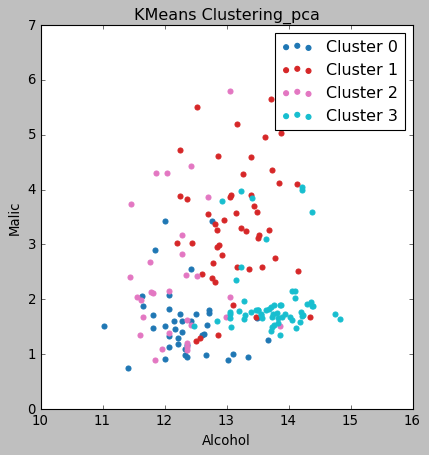

In [46]:
# Select the two features for the scatter plot
x_feature = 'Alcohol'
y_feature = 'Malic'

# Scatter plot
plt.figure(figsize=(6,6))
unique_clusters = np.unique(data['cluster_pca'])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_data = data[data['cluster_pca'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], 
                label=f'Cluster {cluster}', color=color)

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('KMeans Clustering_pca')
plt.legend()
plt.show()

# Silhouette Score

In [47]:
from sklearn.metrics import silhouette_score

**Silhouette score for KMeans clustering - Normal data:**

In [48]:
# Calculate the silhouette score
labels = data['cluster']
# Exclude noise points (label = -1) from the silhouette score calculation
sil_score_KMeans = silhouette_score(data_norm[labels != -1], labels[labels != -1])

print(f'Silhouette Score for KMeans clustering - Normal data: {sil_score_KMeans}')

Silhouette Score for KMeans clustering - Normal data: 0.278251898991449


**Silhouette score for KMeans clustering - PCA data:**

In [49]:
#Calculate the silhouette score
labels = data['cluster_pca']
# Exclude noise points (label = -1) from the silhouette score calculation
sil_score_KMeans = silhouette_score(finalDf[labels != -1], labels[labels != -1])

print(f'Silhouette Score for KMeans clustering - PCA data: {sil_score_KMeans}')

Silhouette Score for KMeans clustering - PCA data: 0.41846695629246833


# Hierarchical Clustering

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

**For normal data:**

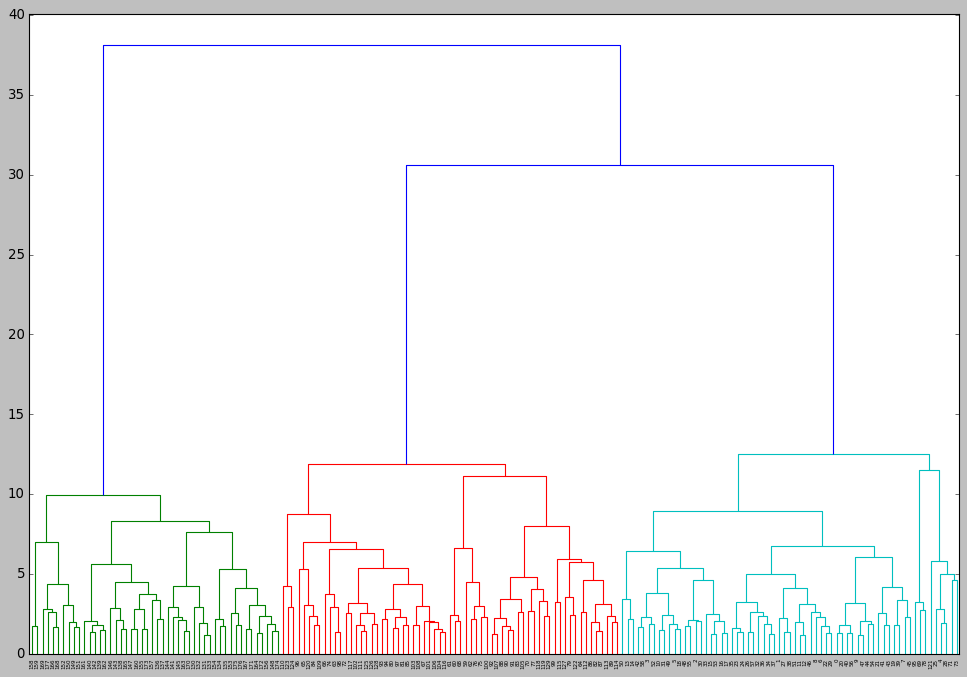

In [51]:
plt.figure(figsize=(15,10))
mergings = linkage(data_norm, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

The seperation in Ward Method indicate that **4 is the optimal number for clusters**

**For PCA data:**

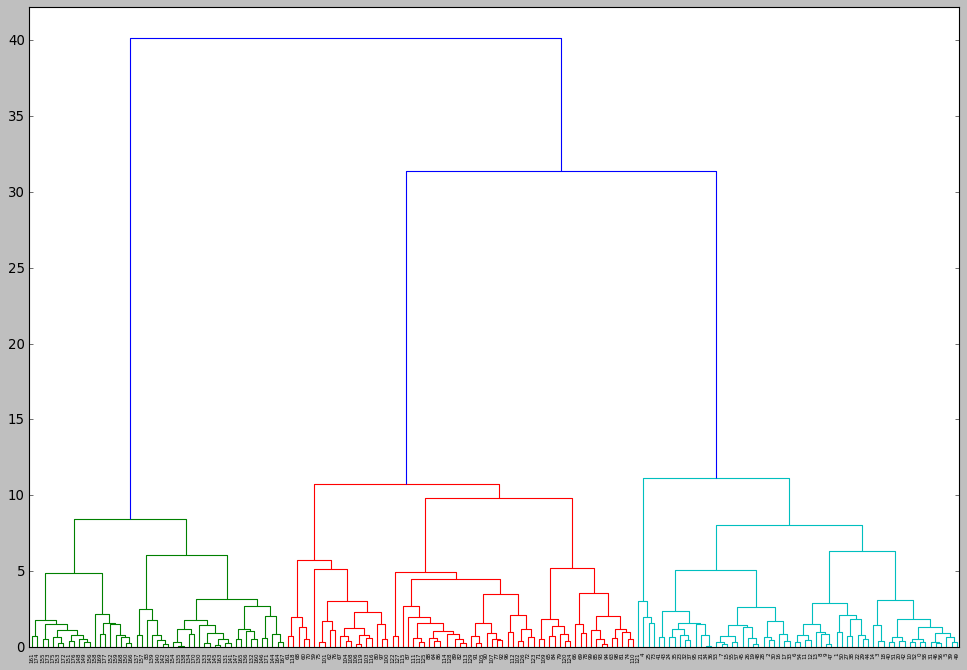

In [52]:
plt.figure(figsize=(15,10))
mergings = linkage(finalDf, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

For PCA data aswell the seperation in Ward Method indicate that **4 is the optimal number for clusters**

# Conclusion

Silhouette Score for KMeans clustering - Normal data: 0.2712
Silhouette Score for KMeans clustering - PCA data: 0.4048

The Silhouette Score of 0.271 suggests that the clusters formed by KMeans clustering on the original (non-PCA transformed) data are moderately grouped but with some overlap between clusters.

The Silhouette Score of 0.405 for PCA-transformed data indicates better-defined clusters compared to the original data.

**Thus it implies that the PCA transformation has potentially reduced noise or enhanced the separability of the data points in feature space.**